In [34]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import svm
import random
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import imblearn.over_sampling
import imblearn.under_sampling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
np.random.seed(42)

In [36]:
model_df = pd.read_csv('clean_df.csv')
model_df.head()

,Unnamed: 0,Number of Form Submissions,Number of Pageviews,Number of Visits,Signin_count,Mailchimp_Optouts,CO_PN,Lifecycle_Stage_Customer,Lifecycle_Stage_Lead,Lifecycle_Stage_Marketing Qualified Lead,...,Original_Source_Email Marketing,Original_Source_Offline Sources,Original_Source_Organic Search,Original_Source_Paid Search,Original_Source_Paid Social,Original_Source_Referrals,Original_Source_Social Media,Has_Site_Visits,Has_Form_Submissions,Has_Logins
0,0,0,0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,5,1,54.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,2,0,0,0,0.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,1,0,0,0.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
model_df = model_df.drop(columns=['Unnamed: 0'])
model_df.head()

,Number of Form Submissions,Number of Pageviews,Number of Visits,Signin_count,Mailchimp_Optouts,CO_PN,Lifecycle_Stage_Customer,Lifecycle_Stage_Lead,Lifecycle_Stage_Marketing Qualified Lead,Lifecycle_Stage_Opportunity,...,Original_Source_Email Marketing,Original_Source_Offline Sources,Original_Source_Organic Search,Original_Source_Paid Search,Original_Source_Paid Social,Original_Source_Referrals,Original_Source_Social Media,Has_Site_Visits,Has_Form_Submissions,Has_Logins
0,0,0,0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,5,1,54.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
model_df.columns

Index(['Number of Form Submissions', 'Number of Pageviews', 'Number of Visits',
       'Signin_count', 'Mailchimp_Optouts', 'CO_PN',
       'Lifecycle_Stage_Customer', 'Lifecycle_Stage_Lead',
       'Lifecycle_Stage_Marketing Qualified Lead',
       'Lifecycle_Stage_Opportunity', 'Lifecycle_Stage_Sales Qualified Lead',
       'Original_Source_Direct Traffic', 'Original_Source_Email Marketing',
       'Original_Source_Offline Sources', 'Original_Source_Organic Search',
       'Original_Source_Paid Search', 'Original_Source_Paid Social',
       'Original_Source_Referrals', 'Original_Source_Social Media',
       'Has_Site_Visits', 'Has_Form_Submissions', 'Has_Logins'],
      dtype='object')

In [39]:
model_df['Lifecycle_Stage_Customer'].value_counts()

0    8676
1    4532
Name: Lifecycle_Stage_Customer, dtype: int64

In [40]:
# Look at means of each feature for customer and non-customer groups to see which features might be predictive
customer_means = model_df.groupby('Lifecycle_Stage_Customer').mean()
customer_means

,Number of Form Submissions,Number of Pageviews,Number of Visits,Signin_count,Mailchimp_Optouts,CO_PN,Lifecycle_Stage_Lead,Lifecycle_Stage_Marketing Qualified Lead,Lifecycle_Stage_Opportunity,Lifecycle_Stage_Sales Qualified Lead,...,Original_Source_Email Marketing,Original_Source_Offline Sources,Original_Source_Organic Search,Original_Source_Paid Search,Original_Source_Paid Social,Original_Source_Referrals,Original_Source_Social Media,Has_Site_Visits,Has_Form_Submissions,Has_Logins
Lifecycle_Stage_Customer,,,,,,,,,,,,,,,,,,,,,
0,0.94698,7.427732,2.876441,5.688819,0.011526,0.770747,0.563854,0.0642,0.151683,0.160788,...,0.070539,0.470148,0.119064,0.045067,0.015560,0.055210,0.033080,0.548640,0.556132,0.186607
1,0.98985,23.616284,9.347970,13.248897,0.009047,0.253751,0.000000,0.0000,0.000000,0.000000,...,0.096425,0.544572,0.112533,0.024713,0.002648,0.014784,0.011033,0.526478,0.529347,0.514342


### Functions to call on different models to get various model scores or visualizations

In [41]:
def cross_validate(model, kfolds):
    '''
    This function reads in a baseline model, set kfolds for cross validation, and returns scoring metrics.
    '''
    accuracy = cross_val_score(model, X_train, y_train, cv = kfolds, scoring = 'accuracy').mean()
    roc = cross_val_score(model, X_train, y_train, cv = kfolds, scoring = 'roc_auc').mean()
    f1 = cross_val_score(model, X_train, y_train, cv = kfolds, scoring = 'f1').mean()
    recall = cross_val_score(model, X_train, y_train, cv = kfolds, scoring = 'recall').mean()
    print('Accuracy Score: %s'%(accuracy))
    print('ROC AUC Score: %s'%(roc))
    print('F1 Score: %s'%(f1))
    print('Recall Score: %s'%(recall))

In [43]:
def make_confusion_matrix(model, threshold=0.5):
    '''
    Create confusion matrix based on correct and incorrect predictions of whether each observation
    is a customer or non-customer
    '''
    
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Purples, annot=True, square=True, fmt='d',
           xticklabels=['non-customer', 'customer'],
           yticklabels=['non-customer', 'customer']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

In [42]:
def model_scores(model):
    '''
    Takes in each model type along with X, y train values. Outputs model scores on test set for each model.
    '''
    
    model_fit = model.fit(X_train, y_train)
    y_predict = model_fit.predict(X_train)
    
    print('ROC Score: %s'%(roc_auc_score(y_train, y_predict)))
    print('F1 Score: %s'%(f1_score(y_train, y_predict)))
    print('Recall Score: %s'%(recall_score(y_train, y_predict)))

    return model_fit

In [44]:
def f1_scores(model_type):
    '''
    Compute model precision and recall scores at each probability threshold to output the best F1 score for a model type
    '''
    X_val, y_val = X_test, y_test 

    thresh_ps = np.linspace(.10,.50,100)
    model_val_probs = model_type.predict_proba(X_val)[:,1] 
    f1_scores = []
    for p in thresh_ps:
        model_val_labels = model_val_probs >= p
        f1_scores.append(f1_score(model_val_labels, y_val))

    plt.plot(thresh_ps, f1_scores)
    plt.title('F1 Score vs. Positive Class Decision Probability Threshold')
    plt.xlabel('P threshold')
    plt.ylabel('F1 score')

    best_f1_score = np.max(f1_scores) 
    best_thresh_p = thresh_ps[np.argmax(f1_scores)]

    print('Highest F1 score %.3f at probability decision threshold >= %.3f' 
          % (best_f1_score, best_thresh_p))

In [45]:
def threshold_cm(model, threshold=0.5):
    '''
    Create confusion matrix based on correct and incorrect predictions of whether each observation
    is a customer or non-customer at any proability threshold
    '''
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    print('Recall: %s'%(recall_score(y_test, y_predict)))
    plt.figure(dpi=80)
    thresh_cm = sns.heatmap(fraud_confusion, cmap=plt.cm.Purples, annot=True, square=True, fmt='d',
           xticklabels=['Non-Customer', 'Customer'],
           yticklabels=['Non-Customer', 'Customer']);
    thresh_cm.set_yticklabels(thresh_cm.get_yticklabels(), rotation = 0)
    plt.xlabel('Predictions', fontsize=10)
    plt.ylabel('Actual Values', rotation=0, fontsize=10)
    plt.title('Customer and Non-Customer Predictions')
    plt.tight_layout()
    plt.show()

In [46]:
model_df.corr()['Lifecycle_Stage_Customer'].sort_values(ascending=False)

Lifecycle_Stage_Customer                    1.000000
Has_Logins                                  0.339838
Number of Visits                            0.132127
Number of Pageviews                         0.099941
Original_Source_Offline Sources             0.070669
Original_Source_Email Marketing             0.045450
Number of Form Submissions                  0.014423
Signin_count                                0.010211
Original_Source_Direct Traffic              0.007347
Original_Source_Organic Search             -0.009653
Mailchimp_Optouts                          -0.011453
Has_Site_Visits                            -0.021114
Has_Form_Submissions                       -0.025545
Original_Source_Paid Search                -0.050487
Original_Source_Paid Social                -0.058434
Original_Source_Social Media               -0.066380
Original_Source_Referrals                  -0.096409
Lifecycle_Stage_Marketing Qualified Lead   -0.151653
Lifecycle_Stage_Opportunity                -0.

Start by running baseline classification models on all features.

In [47]:
X = model_df.drop(columns = ['Lifecycle_Stage_Customer'])
y = model_df['Lifecycle_Stage_Customer']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
knn = model_scores(KNeighborsClassifier(n_neighbors= 10))

ROC Score: 0.8955570666759536
F1 Score: 0.8602061855670105
Recall Score: 0.8698915763135947


In [50]:
cross_validate(knn, 5)

Accuracy Score: 0.8809404309687757
ROC AUC Score: 0.9515962616063133
F1 Score: 0.8234175731161868
Recall Score: 0.8168096121155927


In [51]:
logit = model_scores(LogisticRegression(C = 1))

ROC Score: 0.9720145129790204
F1 Score: 0.950132625994695
Recall Score: 0.9958298582151793


In [52]:
cross_validate(logit, 5)

Accuracy Score: 0.9636557186225472
ROC AUC Score: 0.9952022002199463
F1 Score: 0.9491795041307579
Recall Score: 0.9952754597434709


In [53]:
bernoulli_nb = model_scores(BernoulliNB())

ROC Score: 0.9174894154752532
F1 Score: 0.9081893313298274
Recall Score: 0.8401445649152072


In [54]:
cross_validate(bernoulli_nb,5)

Accuracy Score: 0.9421725435254796
ROC AUC Score: 0.9938717014579513
F1 Score: 0.9081793181567835
Recall Score: 0.8401452634832328


In [55]:
svm = model_scores(svm.LinearSVC())

ROC Score: 0.9701716083056251
F1 Score: 0.94909381663113
Recall Score: 0.9899916597164303


In [56]:
#make_confusion_matrix(svm)

Will not use SVM models going forward because they are providing low scores and do not give probabilities.

The models above only perform well because other lifecycle stages are used as a predictor, must remove since they are multicollinear with the target variable. Will remove those variables from model going forward.

#### After running models on different combinations of variables, the variables not commented out in reduced_x below produced the best model scores. Adding more variables does not increase model scores, while removing more than the 4 variables below significantly reduces all model scores.

In [57]:
#model_df[reduced_x].corr()['Lifecycle_Stage_Customer']

In [58]:
reduced_x = ['Number of Pageviews', 'Number of Visits',
        'CO_PN', 'Has_Logins'] #'Lifecycle_Stage_Customer']
       #'Original_Source_Direct Traffic', 'Original_Source_Organic Search' 'Original_Source_Email Marketing',
       #'Original_Source_Offline Sources', 'Original_Source_Email Marketing'
       #'Original_Source_Paid Search', 'Original_Source_Paid Social', 'Original_Source_Referrals']
        #'Signin count', 'Number of Form Submissions', 
       #'Original_Source_Referrals', 'Original_Source_Social Media']
        #'Has_Form_Submissions', 'Mailchimp_Optouts', 'Has_Site_Visits']

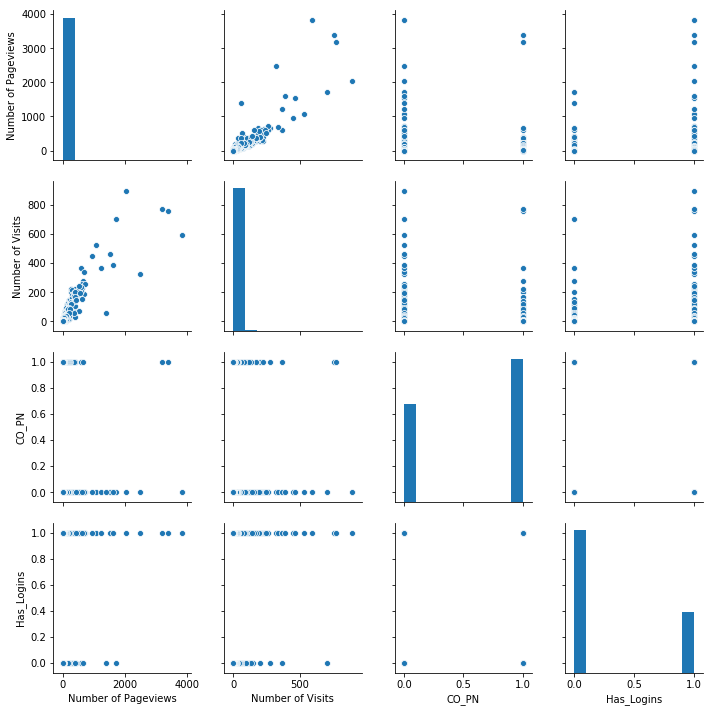

In [59]:
sns.pairplot(model_df[reduced_x]);

#### Only clear separation of classes seen in pairplots is for people with high volume of pageviews and site visits. After running models on different combinations of variables, the ones not commented out in reduced_x above produced the best model scores. Adding more variables does not increase model scores, while removing more than the 4 variables above significantly reduces all model scores.



In [60]:
X = model_df[reduced_x]
y = model_df['Lifecycle_Stage_Customer']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
knn = model_scores(KNeighborsClassifier(n_neighbors= 10))

ROC Score: 0.7475838728667442
F1 Score: 0.6656474545176579
Recall Score: 0.605226577703642


In [63]:
cross_validate(knn, 5)

Accuracy Score: 0.7760754615944363
ROC AUC Score: 0.8139876930800376
F1 Score: 0.6353654023826792
Recall Score: 0.5732564518621542


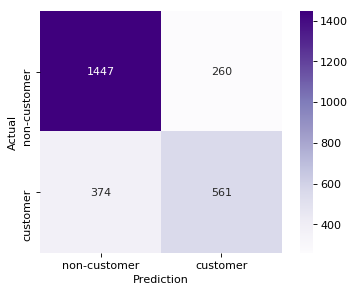

In [64]:
make_confusion_matrix(knn)

In [65]:
log_reg = model_scores(LogisticRegression(C = 1, solver='liblinear'))

ROC Score: 0.6911478942070514
F1 Score: 0.5781300549983824
Recall Score: 0.49680289129830413


In [66]:
cross_validate(log_reg, 5)

Accuracy Score: 0.7511860185101932
ROC AUC Score: 0.8154823138417804
F1 Score: 0.5764520477381294
Recall Score: 0.4976359913460053


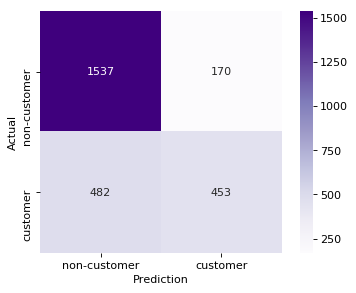

In [67]:
make_confusion_matrix(log_reg)

In [68]:
gaussian_nb = model_scores(GaussianNB())

ROC Score: 0.6835213637039812
F1 Score: 0.5523255813953488
Recall Score: 0.422574367528496


In [69]:
cross_validate(gaussian_nb, 5)

Accuracy Score: 0.7513721894451953
ROC AUC Score: 0.8207266954224852
F1 Score: 0.489684137688051
Recall Score: 0.3669444444444444


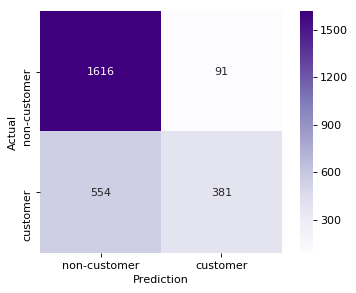

In [70]:
make_confusion_matrix(gaussian_nb)

In [71]:
bernoulli_nb = model_scores(BernoulliNB())

ROC Score: 0.7394320205853853
F1 Score: 0.6532333645735708
Recall Score: 0.5813177648040033


In [72]:
cross_validate(bernoulli_nb, 5)

Accuracy Score: 0.7902715845411821
ROC AUC Score: 0.82588172718264
F1 Score: 0.6523632478251759
Recall Score: 0.5779809921186833


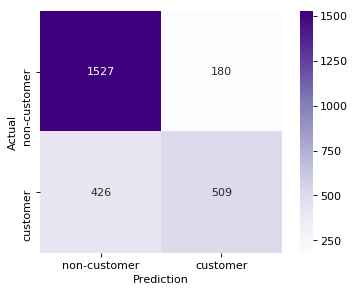

In [73]:
make_confusion_matrix(bernoulli_nb)

In [74]:
d_tree = model_scores(DecisionTreeClassifier())

ROC Score: 0.7923213741398072
F1 Score: 0.7304932050694762
Recall Score: 0.6649986099527384


In [75]:
cross_validate(d_tree, 5)

Accuracy Score: 0.7706811390507186
ROC AUC Score: 0.7610008630273588
F1 Score: 0.6404250603290977
Recall Score: 0.5963332560655231


In [76]:
rf = model_scores(RandomForestClassifier(n_estimators=500, max_depth = 50))

ROC Score: 0.8019348404724796
F1 Score: 0.7417373501023692
Recall Score: 0.705031971087017


In [77]:
cross_validate(rf, 5)

Accuracy Score: 0.774844849109581
ROC AUC Score: 0.8104579054178336
F1 Score: 0.6495742203615733
Recall Score: 0.6149575027043733


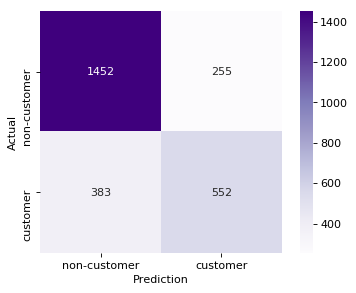

In [78]:
make_confusion_matrix(d_tree)

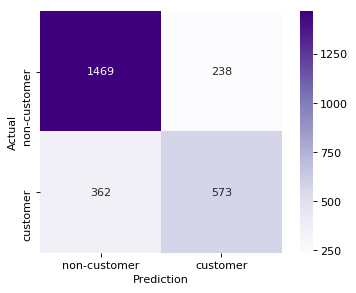

In [79]:
make_confusion_matrix(rf)

In [80]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1707
           1       0.71      0.61      0.66       935

   micro avg       0.77      0.77      0.77      2642
   macro avg       0.75      0.74      0.74      2642
weighted avg       0.77      0.77      0.77      2642



In [81]:
from ipywidgets import interactive, FloatSlider
interactive(lambda threshold: threshold_cm(rf, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

#### All models make a disproportionate number of non-customer predictions. I want to increase customer recall without significantly reducing roc_auc scores. I will try resampling to improve recall scores. 

#### Since models are gaining accuracy from making excessive non-customer predicitons, that metric will be disregarded going forward.

### Smote Oversampling

In [82]:
smote = imblearn.over_sampling.SMOTE(ratio={0:8676,1:4532*2})
    
X_tr_smote, y_tr_smote = smote.fit_sample(X_train, y_train)

lr_smote = LogisticRegression(solver='liblinear', C=1) 
lr_smote.fit(X_tr_smote, y_tr_smote)

print('Logistic Regression on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
        (recall_score(lr_smote.predict(X_test), y_test), roc_auc_score(y_test, lr_smote.predict_proba(X_test)[:,1])))

Logistic Regression on SMOTE Train Data; Test Recall: 0.634, Test AUC: 0.806


In [83]:
print(classification_report(y_test, lr_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1707
           1       0.63      0.74      0.68       935

   micro avg       0.76      0.76      0.76      2642
   macro avg       0.74      0.75      0.74      2642
weighted avg       0.77      0.76      0.76      2642



In [84]:
knn_smote = KNeighborsClassifier(n_neighbors= 10)
knn_smote.fit(X_tr_smote, y_tr_smote)

print('KNN on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(knn_smote.predict(X_test), y_test), roc_auc_score(y_test, knn_smote.predict_proba(X_test)[:,1])))

KNN on SMOTE Train Data; Test Recall: 0.646, Test AUC: 0.791


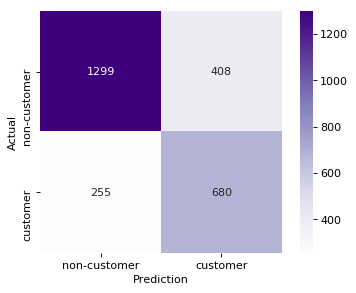

In [85]:
make_confusion_matrix(knn_smote)

In [86]:
print(classification_report(y_test, knn_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1707
           1       0.65      0.69      0.67       935

   micro avg       0.76      0.76      0.76      2642
   macro avg       0.73      0.74      0.74      2642
weighted avg       0.76      0.76      0.76      2642



In [87]:
bernoulli_smote = BernoulliNB()
bernoulli_smote.fit(X_tr_smote, y_tr_smote)

print('Bernoulli on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(bernoulli_smote.predict(X_test), y_test), roc_auc_score(y_test, bernoulli_smote.predict_proba(X_test)[:,1])))


Bernoulli on SMOTE Train Data; Test Recall: 0.632, Test AUC: 0.812


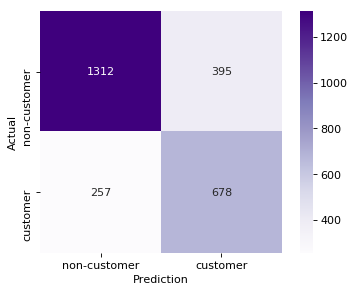

In [88]:
make_confusion_matrix(bernoulli_smote)

In [89]:
print(classification_report(y_test, bernoulli_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1707
           1       0.63      0.73      0.68       935

   micro avg       0.75      0.75      0.75      2642
   macro avg       0.73      0.75      0.74      2642
weighted avg       0.76      0.75      0.76      2642



In [90]:
d_tree_smote = DecisionTreeClassifier()
d_tree_smote.fit(X_tr_smote, y_tr_smote)
print('Decision Tree on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(d_tree_smote.predict(X_test), y_test), roc_auc_score(y_test, d_tree_smote.predict_proba(X_test)[:,1])))

Decision Tree on SMOTE Train Data; Test Recall: 0.636, Test AUC: 0.755


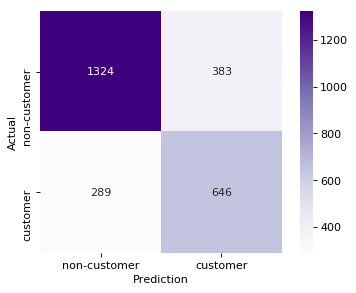

In [91]:
make_confusion_matrix(d_tree_smote)

In [92]:
print(classification_report(y_test, d_tree_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1707
           1       0.64      0.68      0.66       935

   micro avg       0.75      0.75      0.75      2642
   macro avg       0.73      0.73      0.73      2642
weighted avg       0.75      0.75      0.75      2642



In [93]:
rf_smote = RandomForestClassifier(n_estimators=500, max_depth = 50)
rf_smote.fit(X_tr_smote, y_tr_smote)
print('Random Forest on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(rf_smote.predict(X_test), y_test), roc_auc_score(y_test, rf_smote.predict_proba(X_test)[:,1])))


Random Forest on SMOTE Train Data; Test Recall: 0.637, Test AUC: 0.791


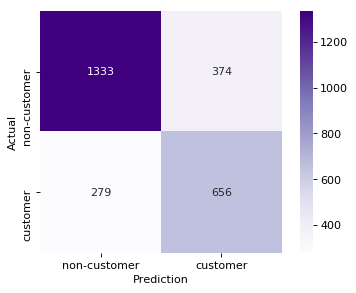

In [94]:
make_confusion_matrix(rf_smote)

In [95]:
print(classification_report(y_test, rf_smote.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1707
           1       0.64      0.70      0.67       935

   micro avg       0.75      0.75      0.75      2642
   macro avg       0.73      0.74      0.74      2642
weighted avg       0.76      0.75      0.76      2642



#### All models have better recall scores with SMOTE oversampling, enabling us to identify more customers. Since most models have similar performance, I will tune them to see which tuned SMOTE model returns the best recall scores. 

In [96]:
# define the parameter values that should be searched
k = list(range(1, 31))
weights = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k, weights=weights)
#print(param_grid)

# instantiate and fit the grid
knn_grid = RandomizedSearchCV(knn_smote, param_grid, cv=5, scoring='recall')
knn_grid.fit(X_tr_smote, y_tr_smote)

# view the complete results
knn_grid.cv_results_

# examine the best model
print(knn_grid.best_score_)
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

0.7530815289005173
{'weights': 'distance', 'n_neighbors': 27}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=27, p=2,
           weights='distance')


In [97]:
# define the parameter values that should be searched
C = [.0001, .001, .01, 1, 10, 100, 1000, 10000]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C)
#print(param_grid)

# instantiate and fit the grid
lr_grid = RandomizedSearchCV(lr_smote, param_grid, cv=5, scoring='recall')
lr_grid.fit(X_tr_smote, y_tr_smote)

# view the complete results
lr_grid.cv_results_

# examine the best model
print(lr_grid.best_score_)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)


0.7982119741995255
{'C': 0.001}
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [98]:
params_grid = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

dt_grid = RandomizedSearchCV(d_tree_smote, params_grid, cv = 5, scoring = 'recall')
dt_grid.fit(X_tr_smote, y_tr_smote)

dt_grid.cv_results_

print(dt_grid.best_score_)
print(dt_grid.best_params_)
print(dt_grid.best_estimator_)

0.7791249183201984
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=60,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [99]:
params_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'n_jobs': list(range(1,10))}

rf_grid = RandomizedSearchCV(rf_smote, params_grid, cv = 5, scoring = 'recall')
rf_grid.fit(X_tr_smote, y_tr_smote)

rf_grid.cv_results_

print(rf_grid.best_score_)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)


0.792584726093044
{'n_jobs': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### Tuned Random Forest and Logistic Regression Smote Models returns the best recall scores of any model type. I will see how they perform on test data, look at the tradeoff between precision and recall for each,  and adjust probability thresholds to determine which one to use as final model.

In [100]:
best_lr_smote = LogisticRegression(C=.001)
best_lr_smote.fit(X_tr_smote, y_tr_smote)
print('Random Forest on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(best_lr_smote.predict(X_test), y_test), roc_auc_score(y_test, lr_smote.predict_proba(X_test)[:,1])))

Random Forest on SMOTE Train Data; Test Recall: 0.632, Test AUC: 0.806


Highest F1 score 0.691 at probability decision threshold >= 0.496


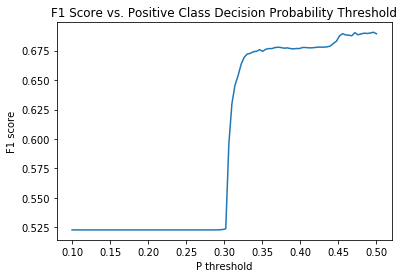

In [101]:
f1_scores(best_lr_smote)

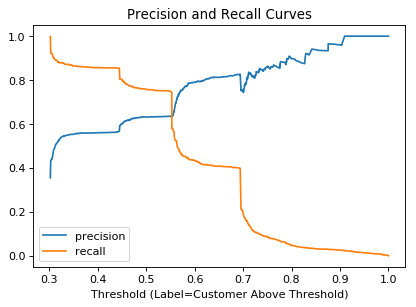

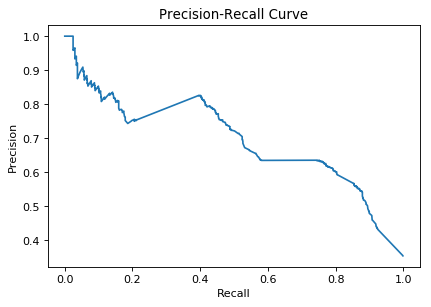

In [102]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_lr_smote.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (Label=Customer Above Threshold)');
plt.title('Precision and Recall Curves');

plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [103]:
from ipywidgets import interactive, FloatSlider
interactive(lambda threshold: threshold_cm(best_lr_smote, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [104]:
best_rf_smote = RandomForestClassifier(n_estimators=100,max_features='sqrt',bootstrap=True, min_samples_leaf=1, min_samples_split=5, max_depth=40, n_jobs = 9)
best_rf_smote.fit(X_tr_smote, y_tr_smote)
print('Random Forest on SMOTE Train Data; Test Recall: %.3f, Test AUC: %.3f' % \
      (recall_score(best_rf_smote.predict(X_test), y_test), roc_auc_score(y_test, rf_smote.predict_proba(X_test)[:,1])))

Random Forest on SMOTE Train Data; Test Recall: 0.641, Test AUC: 0.791


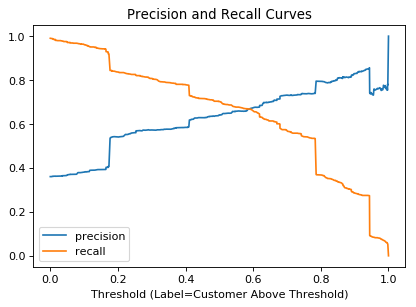

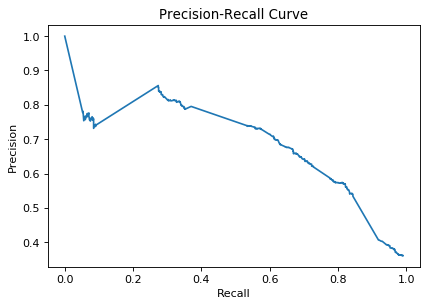

In [105]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_rf_smote.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (Label=Customer Above Threshold)');
plt.title('Precision and Recall Curves');

plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

Highest F1 score 0.673 at probability decision threshold >= 0.278


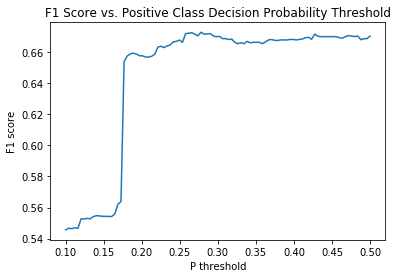

In [106]:
f1_scores(best_rf_smote)

In [107]:
from ipywidgets import interactive, FloatSlider
interactive(lambda threshold: threshold_cm(best_rf_smote, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

Best probability thresholds for tuned models are .26 for Random Forest and .45 for Logistic Regression. Lowering threshold further results in only slightly higher customer recall at the expense of much lower precision with non-customer predictions. 

#### Final Logistic Regression model has virutallly identical recall with final Random Forest Model. However, it has better precision in prediciting non-customers and is more interpretable, so  Logistic Regression SMOTE model with probabilty threshold of .45 is the final model. Coefficients listed below. 

In [108]:
best_lr_smote.coef_

array([[-0.00397658,  0.0279002 , -1.04558092,  0.61356563]])